* Note: *italics* are the paragraphs I borrowed from the project descirptition.

# Stroop task
*In a Stroop task, participants are presented with a list of words, with each word displayed in a
color of ink. The participant’s task is to say out loud the color of the ink in which the word is
printed. The task has two conditions: a congruent words condition, and an incongruent words
condition. In the congruent words condition, the words being displayed are color words whose
names match the colors in which they are printed: for example RED, BLUE. In the incongruent
words condition, the words displayed are color words whose names do not match the colors in
which they are printed: for example PURPLE, ORANGE. In each case, we measure the time it
takes to name the ink colors in equally­sized lists. Each participant will go through and record a
time from each condition.*

In [1]:
%%html
<style>
table {float:left}
</style>

## Data investigation
### 1 - What is our independent variable? What is our dependent variable?
  * The task consists of two parts: congruent words test, and incongruent words test. Each of these tests can be considered as two conditions test design. In this case our independent variable would be **whether we use congruent words or incongruent words for the test**.
  * Also our dependent variable would be **the number of seconds (time measurement) to finish each tests** per each participants. 
  * As our independent variable is varying as a participant takes the whole test, the experimental design is **repeated measures design with two conditions**.

### 2 - What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.
  * Let say the mean of the number of seconds it takes for the congruent words test be $\bar{X_c}$ and one for the incongruent words test be $\bar{X_i}$.
  * With the independend variable and dependent variable stated above, we can set the null hypothesis $H_0$ and the alternative hypothesis $H_A$ as follows:
    * $H_0: \bar{X_c} - \bar{X_i} = 0 $
    * $H_A: \bar{X_c} - \bar{X_i} \neq 0 $
  
  , so that $H_0$ represents there is no time difference between the time for congruent words test and incongruent words test, while $H_A$ represent the opposite. In this case we do not assume any directions as we are interested in differences, not which leads to faster test time than other. 
  
  With these hypothesis, **two sample dependent t-test can be performed**. 
  
  It needs to be t-test than z-test as we do not know about the population statistics but only sample statistics. It is two sample test as we have two different samples with each condition (congruent and incongruent). It is dependent since each participants for both test conditions are the same person, doing one test after another, thus they are not independent.

*Now it’s your chance to try out the Stroop task for yourself. Go to this link, which has a Java­
based applet for performing the Stroop task. Record the times that you received on the task
(you do not need to submit your times to the site.) Now, download this dataset which contains
results from a number of participants in the task. Each row of the dataset contains the
performance for one participant, with the first number their results on the congruent task and
the second number their performance on the incongruent task.*

Let's read the given data from [the link](https://www.google.com/url?q=https://drive.google.com/file/d/0B9Yf01UaIbUgQXpYb2NhZ29yX1U/view?usp%3Dsharing&sa=D&ust=1481322308972000&usg=AFQjCNGki-zewfEuKXItXfKZi3YxE0bBNA) provided on the project description. I downloaded the [stroopdata.csv](stroopdata.csv) file and put it on the same directory as this notebook. 

In [2]:
import pandas
import numpy
from IPython.display import display

data = pandas.read_csv('stroopdata.csv')
print 'total {0} lines read'.format(numpy.shape(data)[0])
data.head()

total 24 lines read


,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


### 3 - Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.

Let's get some descriptive statistics.

In [3]:
ns = pandas.Series([len(data), len(data)], list(data.columns))
medians = numpy.median(data, axis=0)
means = numpy.mean(data, axis=0)
stds = numpy.std(data, ddof=1)
meanDiff = means[0] - means[1]

print 'data size:'
print ns
print 'data medians:'
print medians
print 'data means:'
print means
print 'data standard deviations:'
print stds
print 'mean difference'
print meanDiff

data size:
Congruent      24
Incongruent    24
dtype: int64
data medians:
[ 14.3565  21.0175]
data means:
Congruent      14.051125
Incongruent    22.015917
dtype: float64
data standard deviations:
Congruent      3.559358
Incongruent    4.797057
dtype: float64
mean difference
-7.96479166667


Using above code, we can get data size, median values per test, mean values per test, and their standard deviations as follows: 

|        | Congruent | Incongruent |  
|--------|-----------|-------------|
| Size ($n$)  |        24 |     24      |
| Median | 14.3565   | 21.0175     |
| Mean ($\bar{X}$)  | 14.051125 | 22.015917   |
| Standard Deviations ($\sigma$) | 3.559358 | 4.797057 |

$$Therefore,$$

$$n_c = 24,\,n_i = 24$$
$$\bar{X_c} = 14.051125,\,\bar{X_i} = 22.015917$$
$$\sigma_c = 3.559358,\,\sigma_i = 4.797057$$

$$\bar{X_c} - \bar{X_i} = -7.96479166667$$

### 4 - Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.
Let's start with a simple plotting.

#### Graph 1. Time it takes to name the ink colors per test set

In [4]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  

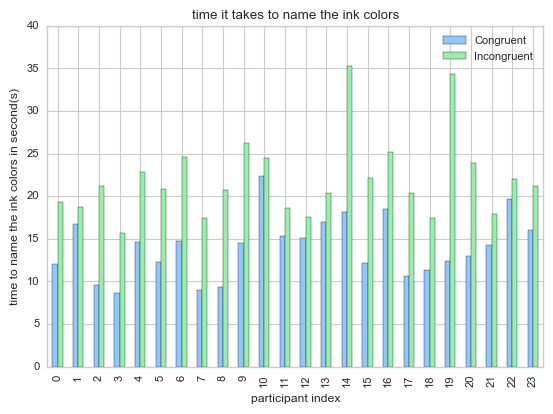

In [12]:
plt.style.use(['seaborn-paper', 'seaborn-whitegrid', 'seaborn-pastel'])
pl = data.plot(kind='bar', title='time it takes to name the ink colors')
pl.set_xlabel('participant index')
pl.set_ylabel('time to name the ink colors in second(s)')

Clearly, this graph shows that for all 24 participants (index 0 to 23) they got finished the test **faster** for the congruent word sets than incongruent word sets, although the differences are vary per participants. This is as expected since the mismatch with the word and the color would make a participant to name its color harder. 

#### Graph 2. Histogram

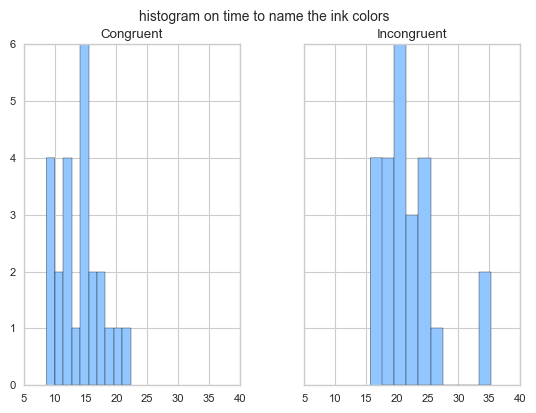

In [28]:
hist = data.hist(sharex=True, sharey=True)
plt.suptitle('histogram on time to name the ink colors')

This graph shows again, as like the above graph 1, that incongruent results are mostly larger than congruent results, which means in general it took more time to name the ink color when the word does not match with it. 

Also we can see, from above histogram, that both congruent and incongruent results are **postively skewed**.

### 5 - Now, perform the statistical test and report your results. What is your confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?